## Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("original_data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         501 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000157FC32D5C0>,
      dtype=object)

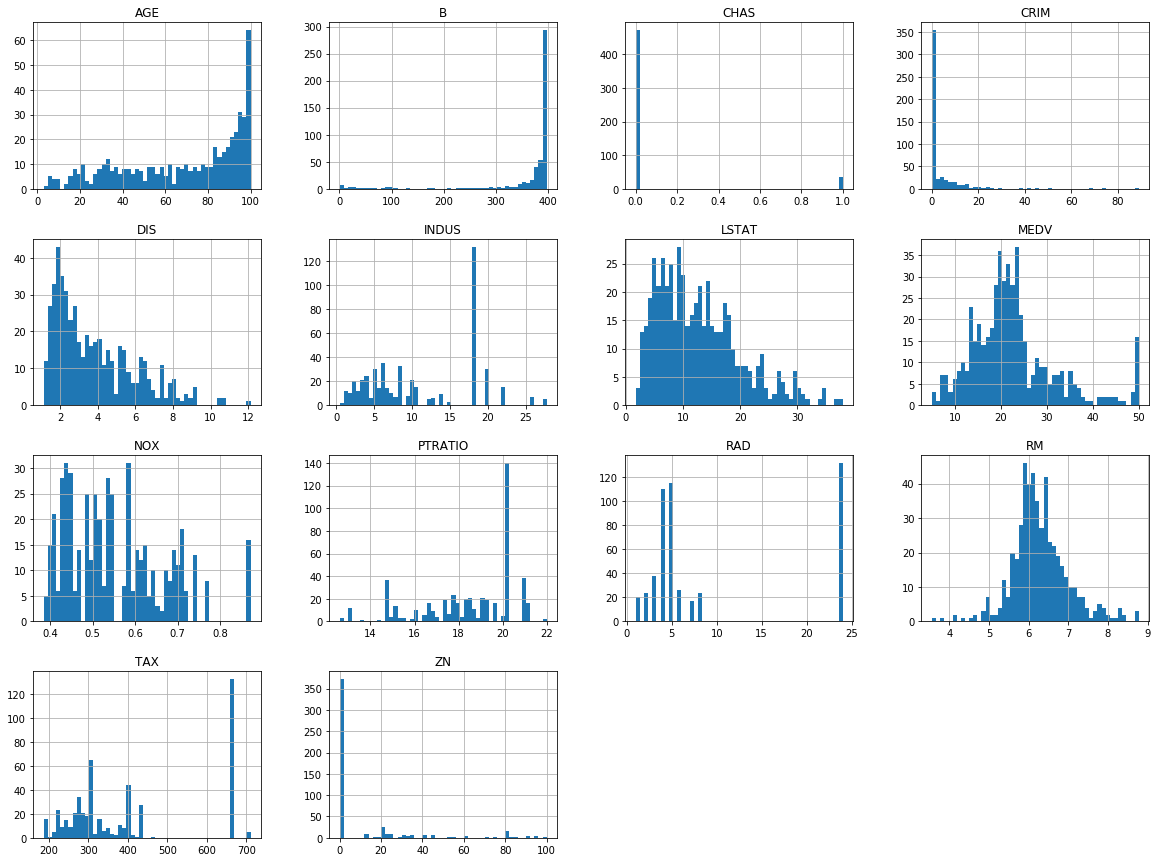

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))

## Train-Test Splitting

In [9]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)

In [11]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 405
Rows in test set: 101



In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
housing = strat_train_set.copy()

## Correlations between various features and price

In [17]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000157FBA26400>,
      dtype=object)

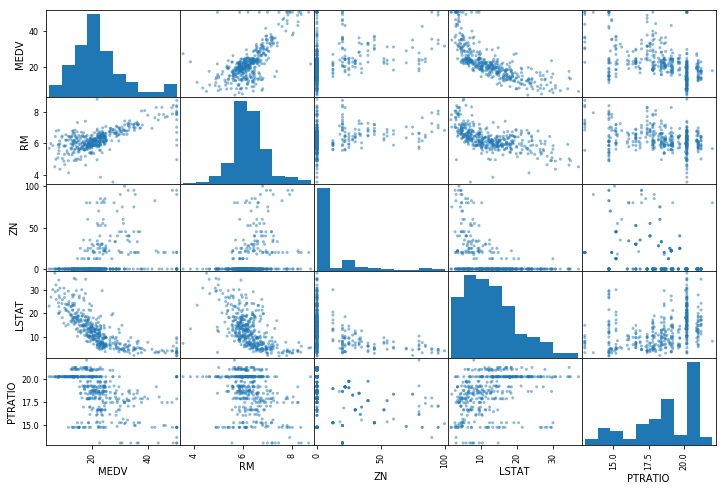

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT","PTRATIO"]
scatter_matrix(housing[attributes], figsize = (12,8))

In [19]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [20]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

In [21]:
a = housing.dropna(subset=["RM"]) #Option 1
a.shape
# Note that the original housing dataframe will remain unchanged

(399, 13)

In [22]:
housing.drop("RM", axis=1).shape # Option 2
# Note that there is no RM column and also note that the original housing dataframe will remain unchanged

(404, 12)

In [23]:
median = housing["RM"].median() # Compute median for Option 3

In [24]:
housing["RM"].fillna(median) # Option 3
# Note that the original housing dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
411    6.657
250    6.487
100    6.727
429    6.380
57     6.816
413    5.155
115    5.928
490    5.093
199    6.975
494    5.926
142    5.403
113    6.092
468    5.926
400    5.987
247    6.226
151    5.404
408    5.617
68     5.594
365    3.561
81     6.619
93     6.211
456    5.976
116    6.176
27     6.047
234    6.726
       ...  
433    6.436
430    6.348
479    6.229
438    5.935
38     5.966
18     5.456
97     8.069
266    7.014
133    5.822
449    6.417
477    5.304
171    5.880
180    7.765
158    6.066
279    6.812
109    6.229
82     6.302
386    4.652
418    5.957
126    5.613
446    6.341
101    6.781
277    6.826
405    5.683
367    3.863
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [25]:
housing.shape

(404, 13)

In [26]:
housing.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [28]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [29]:
X = imputer.transform(housing)

In [30]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [31]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Creating a Pipeline

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [33]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [34]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Real Estates

In [35]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(housing_num_tr, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(housing_num_tr, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [37]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(housing_num_tr, housing_labels)

C:\Users\Abhishek Panigrahi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
some_data = housing.iloc[:5]

In [39]:
some_labels = housing_labels.iloc[:5]

In [40]:
prepared_data = my_pipeline.transform(some_data)

In [41]:
model1.predict(prepared_data)

array([23.99866812, 27.25283558, 20.5818147 , 25.04908672, 23.77464206])

In [42]:
model2.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [43]:
model3.predict(prepared_data)

array([23.  , 25.54, 15.49, 23.94, 23.52])

In [44]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [45]:
from sklearn.metrics import mean_squared_error
housing_predictions1 = model1.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions1)
rmse1 = np.sqrt(mse)

In [46]:
from sklearn.metrics import mean_squared_error
housing_predictions2 = model2.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions2)
rmse2 = np.sqrt(mse)

In [47]:
from sklearn.metrics import mean_squared_error
housing_predictions3 = model3.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions3)
rmse3 = np.sqrt(mse)

In [48]:
rmse1

4.835301058716238

In [49]:
rmse2

0.0

In [50]:
rmse3

1.3126770507645666

## Using better evaluation technique - Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(model1, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores1 = np.sqrt(-scores1)

In [52]:
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(model2, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores2 = np.sqrt(-scores2)

In [53]:
from sklearn.model_selection import cross_val_score
scores3 = cross_val_score(model3, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores3 = np.sqrt(-scores3)

In [54]:
rmse_scores1

array([4.22235612, 4.26438649, 5.09424333, 3.83081183, 5.37600331,
       4.41092152, 7.47272243, 5.48554135, 4.14606627, 6.0717752 ])

In [55]:
rmse_scores2

array([4.1429046 , 5.7009413 , 5.24669466, 4.0159742 , 3.99853098,
       2.81788928, 6.79749954, 5.06478035, 3.25199938, 4.18939136])

In [56]:
rmse_scores3

array([3.25813803, 3.50647937, 4.57023109, 2.27465248, 3.9175844 ,
       2.98215652, 4.97543867, 3.39865267, 3.56112517, 2.86413687])

In [57]:
def print_scores(scores1):
    print("Scores:", scores1)
    print("Mean: ", scores1.mean())
    print("Standard deviation: ", scores1.std())

In [58]:
def print_scores(scores2):
    print("Scores:", scores2)
    print("Mean: ", scores2.mean())
    print("Standard deviation: ", scores2.std())

In [59]:
def print_scores(scores3):
    print("Scores:", scores3)
    print("Mean: ", scores3.mean())
    print("Standard deviation: ", scores3.std())

In [60]:
print_scores(rmse_scores1)

Scores: [4.22235612 4.26438649 5.09424333 3.83081183 5.37600331 4.41092152
 7.47272243 5.48554135 4.14606627 6.0717752 ]
Mean:  5.037482786117751
Standard deviation:  1.0594382405606948


In [61]:
print_scores(rmse_scores2)

Scores: [4.1429046  5.7009413  5.24669466 4.0159742  3.99853098 2.81788928
 6.79749954 5.06478035 3.25199938 4.18939136]
Mean:  4.52266056654364
Standard deviation:  1.1264505271316043


In [62]:
print_scores(rmse_scores3)

Scores: [3.25813803 3.50647937 4.57023109 2.27465248 3.9175844  2.98215652
 4.97543867 3.39865267 3.56112517 2.86413687]
Mean:  3.5308595268673892
Standard deviation:  0.7572103134842223


## Saving the model

In [63]:
from sklearn.externals import joblib
joblib.dump(model1,'Real_Estate1.joblib')

['Real_Estate1.joblib']

## Testing the model on test data

4.143874870573364
[22.69968907 17.21809545 30.02249279 30.74778916  8.89512081 13.32142051
 17.33667356 17.75884279 32.49829759 36.03953505 16.35542057  0.56736309
 23.00036857 20.45406323 20.07195268 12.94763771 31.15259787 13.42929671
 25.03377998 24.16484366 20.41376724 17.03371972 17.78872127 25.59396216
 19.48925131 32.82684685 19.43986145 33.71211148  8.03165673 34.67822079
 19.55672166 21.44813056 29.29990156 16.34255866 26.9868503  18.36287062
 37.29070365 24.57516862 22.25473001 37.13556596 25.15387036 34.46727484
 23.46332441 24.04296023 18.50218667 32.68878654 38.45633313 21.41849048
 17.66121404 16.30911908 21.22360232 12.41720203 19.93411198 20.41550492
 27.9774864  33.08886348 40.09861375 31.36242042 14.94917745 19.75561251
 40.46388017 18.11130418 15.18135521 27.6464993  19.49913588 32.4746605
 23.41651711 20.31958551 21.17791079 33.77535007 34.10374558 27.61946367
 24.52197711 21.88353054 36.17789977  8.56108814 17.44322967 21.51365153
 20.57689904 23.01502065 25.981358

Text(0, 0.5, 'Predicted Value')

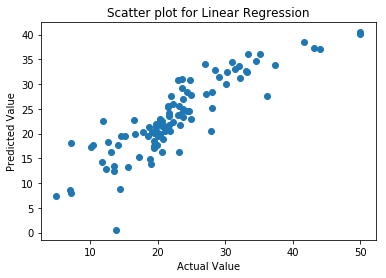

In [64]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions1 = model1.predict(X_test_prepared)
final_mse1 = mean_squared_error(Y_test, final_predictions1)
final_rmse1 = np.sqrt(final_mse1)
print(final_rmse1)
print(final_predictions1, list(Y_test))
plt.scatter(Y_test,final_predictions1)
plt.title('Scatter plot for Linear Regression')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

3.943821178780305
[28.4 11.9 29.  29.6 20.  13.1 22.4 11.5 32.7 43.8 21.7 11.9 21.6 23.1
 19.  11.3 32.7 15.2 24.2 16.6 18.5 14.3 10.9 22.9 16.1 31.6 17.1 31.6
 10.2 32.7 20.  20.6 23.9 10.9 22.3  8.3 48.8 25.3 20.7 46.  25.  30.7
 19.5 19.4 16.2 31.7 48.3 19.  20.1 23.1 24.5 13.8 22.4 17.1 28.6 31.7
 37.6 30.8 19.4 19.9 50.   5.  17.5 23.9 16.7 28.7 17.4 13.4 19.9 36.4
 24.6 22.6 18.5 21.4 32.7 13.8 15.6 18.2 20.6 21.  23.9 19.9 13.4 22.9
 26.4 21.2  9.7 20.3 18.9 23.1 17.5 22.   6.3 26.5 21.9 29.9 24.5 28.7
  8.5 29.4 22.  18.8] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2, 14.6, 33.2, 23.8, 19.9, 21.5, 37.3, 27.0, 22.0, 24.3, 19.8, 33.3, 7.0, 19.4, 20.

Text(0, 0.5, 'Predicted Value')

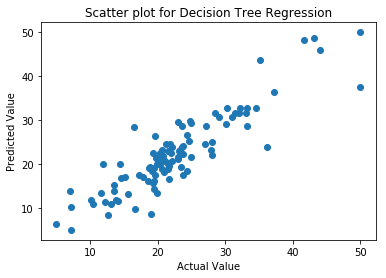

In [65]:
final_predictions2 = model2.predict(X_test_prepared)
final_mse2 = mean_squared_error(Y_test, final_predictions2)
final_rmse2 = np.sqrt(final_mse2)
print(final_rmse2)
print(final_predictions2, list(Y_test))
plt.scatter(Y_test,final_predictions2)
plt.title('Scatter plot for Decision Tree Regression')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

3.1265041870070394
[23.05 10.51 24.72 19.62 17.25 15.02 18.19 15.66 31.87 40.07 20.44  9.78
 26.76 21.88 19.63 10.07 31.69 13.33 24.   17.44 20.33 16.49 13.52 22.6
 18.31 31.19 16.27 34.15  7.9  33.94 21.7  21.48 21.66 10.64 20.69 10.31
 43.54 23.81 23.49 42.23 24.31 26.41 19.77 20.63 19.84 33.09 44.58 20.3
 20.62 22.23 22.21 15.48 21.27 16.16 23.34 31.99 39.81 29.27 19.41 19.97
 46.77  9.42 18.28 25.08 16.06 32.57 18.68 17.56 18.68 34.86 26.46 22.98
 21.95 21.45 34.86 14.39 16.43 20.04 20.41 20.9  22.91 22.47 14.58 24.1
 20.64 21.05 11.5  22.17 22.02 23.39 18.38 27.96  6.58 26.47 17.41 29.57
 20.37 29.55 14.87 27.77 21.46 20.74] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50

Text(0, 0.5, 'Predicted Value')

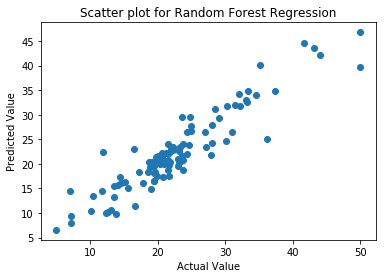

In [66]:
final_predictions3 = model3.predict(X_test_prepared)
final_mse3 = mean_squared_error(Y_test, final_predictions3)
final_rmse3 = np.sqrt(final_mse3)
print(final_rmse3)
print(final_predictions3, list(Y_test))
plt.scatter(Y_test,final_predictions3)
plt.title('Scatter plot for Random Forest Regression')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

4.12930857097173
[16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2, 14.6, 33.2, 23.8, 19.9, 21.5, 37.3, 27.0, 22.0, 24.3, 19.8, 33.3, 7.0, 19.4, 20.9, 21.1, 20.4, 22.2, 11.9, 11.7, 21.6, 19.7, 23.0, 16.7, 21.7, 20.6, 23.3, 19.6, 28.0, 5.0, 24.4, 20.8, 24.8, 21.8, 23.6, 19.0, 25.0, 20.3, 21.5] [23.40549301 16.88682066 27.20910973 27.19426569 11.50598573 12.92642939
 17.35372057 16.86010411 32.7461762  35.24471305 17.62157681  1.09988944
 20.30753575 15.75931242 19.62977684 12.12631879 32.34136228 14.25438756
 24.03918327 22.66679102 20.22290528 16.60118041 20.924848   23.97475706
 17.04671704 31.45221284 18.95344624 31.51382568  8.9339804  34.74336218
 21.51197

Text(0, 0.5, 'Predicted Value')

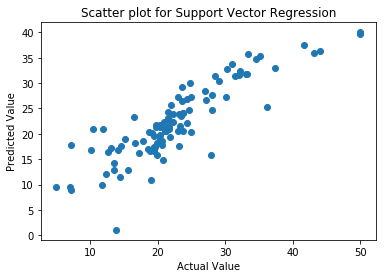

In [67]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear')
svrs = svr_lin
kernel_label = 'Linear'
model_color = 'm'
svrs.fit(housing_num_tr, housing_labels)
e=svrs.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, e)
final_rmse = np.sqrt(final_mse)
print(final_rmse)
print(list(Y_test),e)
plt.scatter(Y_test,e)
plt.title('Scatter plot for Support Vector Regression')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')